In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data_train = pd.read_csv('train.csv')

data_train_Y = data_train[['SalePrice']]
data_train_X = data_train.drop(['SalePrice'], axis=1)
cols_proto = ['GrLivArea', 'LotArea', '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF',
       'YearBuilt', 'GarageArea', 'MoSold', 'YearRemodAdd', 'OverallQual']
data_train[cols_proto].sample(50)

,GrLivArea,LotArea,1stFlrSF,TotalBsmtSF,BsmtUnfSF,YearBuilt,GarageArea,MoSold,YearRemodAdd,OverallQual
570,1728,13101,1728,1728,1497,1965,576,11,1965,5
783,1110,9101,1110,1097,0,1978,602,7,1978,5
358,1352,6930,1352,1062,468,1958,288,7,1958,5
978,894,9450,894,894,342,1954,400,5,1954,4
494,886,5784,886,190,190,1938,273,12,1996,5
1234,1964,8525,1024,940,940,1911,0,11,1950,5
1215,894,7094,894,894,340,1966,384,5,1966,5
656,1053,10007,1053,1053,247,1959,312,8,2006,5
600,1904,10927,1058,1058,512,2005,736,6,2005,8
278,2121,14450,2121,2121,2121,2006,732,5,2007,9


In [37]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

cols_proto = ['GrLivArea', 'LotArea', '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF',
       'YearBuilt', 'GarageArea', 'MoSold', 'YearRemodAdd']

X_train, X_test, y_train, y_test = train_test_split(data_train_X[cols_proto], data_train_Y, test_size=0.33, random_state=rng)

clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
print(xx.shape, yy.shape)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2],
           ["training observations",
            "new regular observations"],
           loc="upper left")
plt.show()

(50, 50) (50, 50)


IndexError: index 2 is out of bounds for axis 1 with size 2

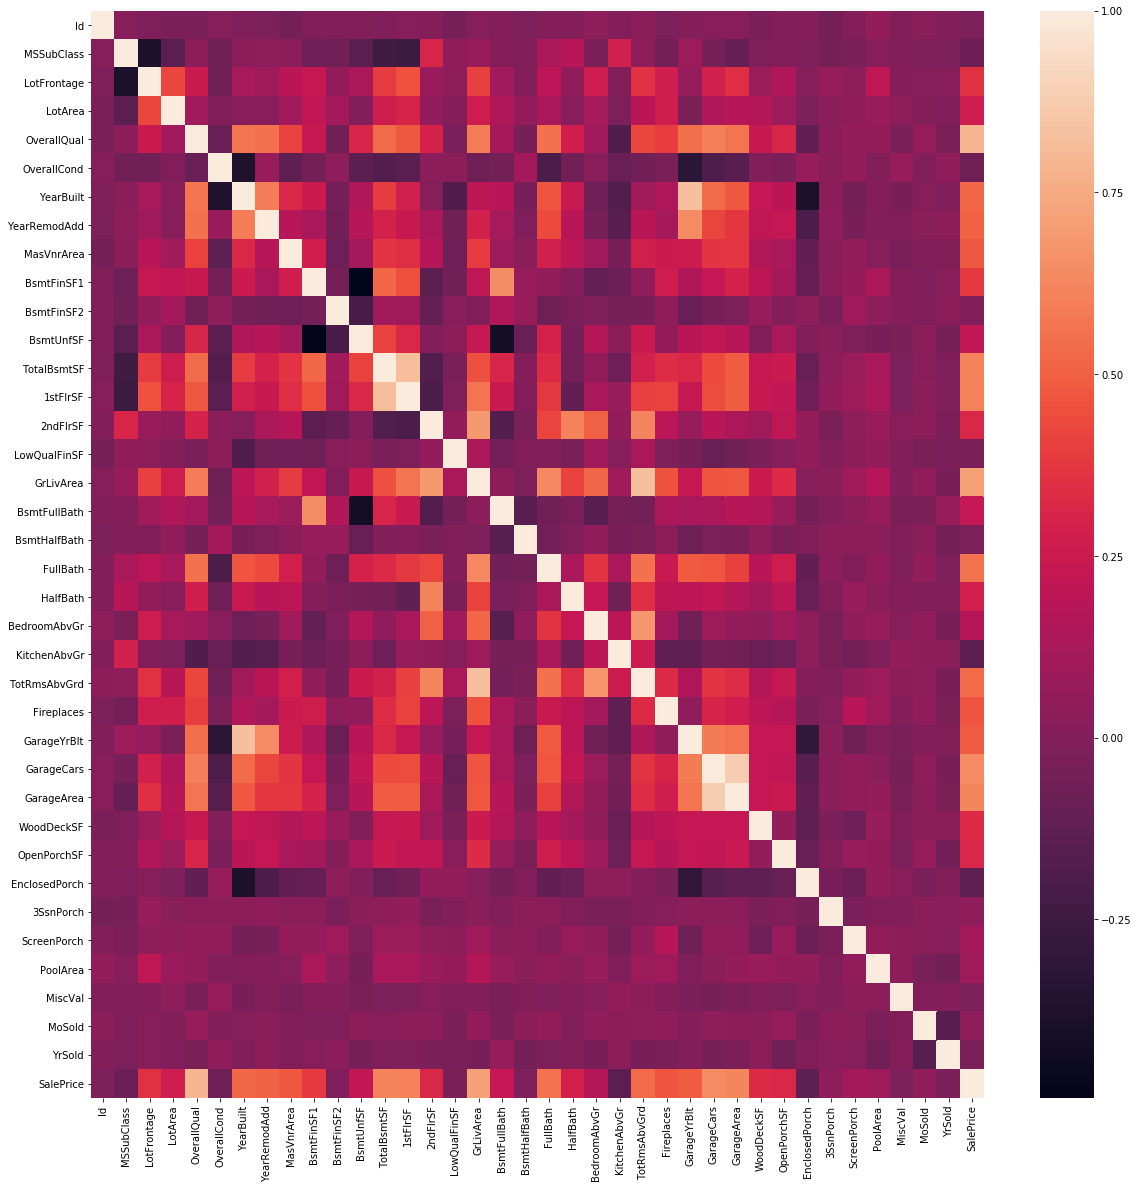

In [4]:
fig = plt.figure(figsize=(20, 20))
corrmap = data_train.corr()
sns.heatmap(corrmap)

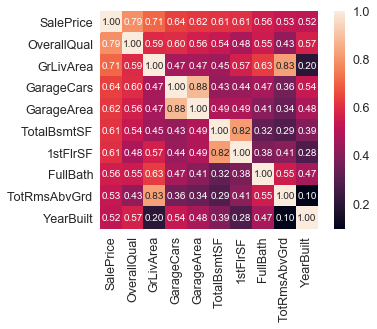

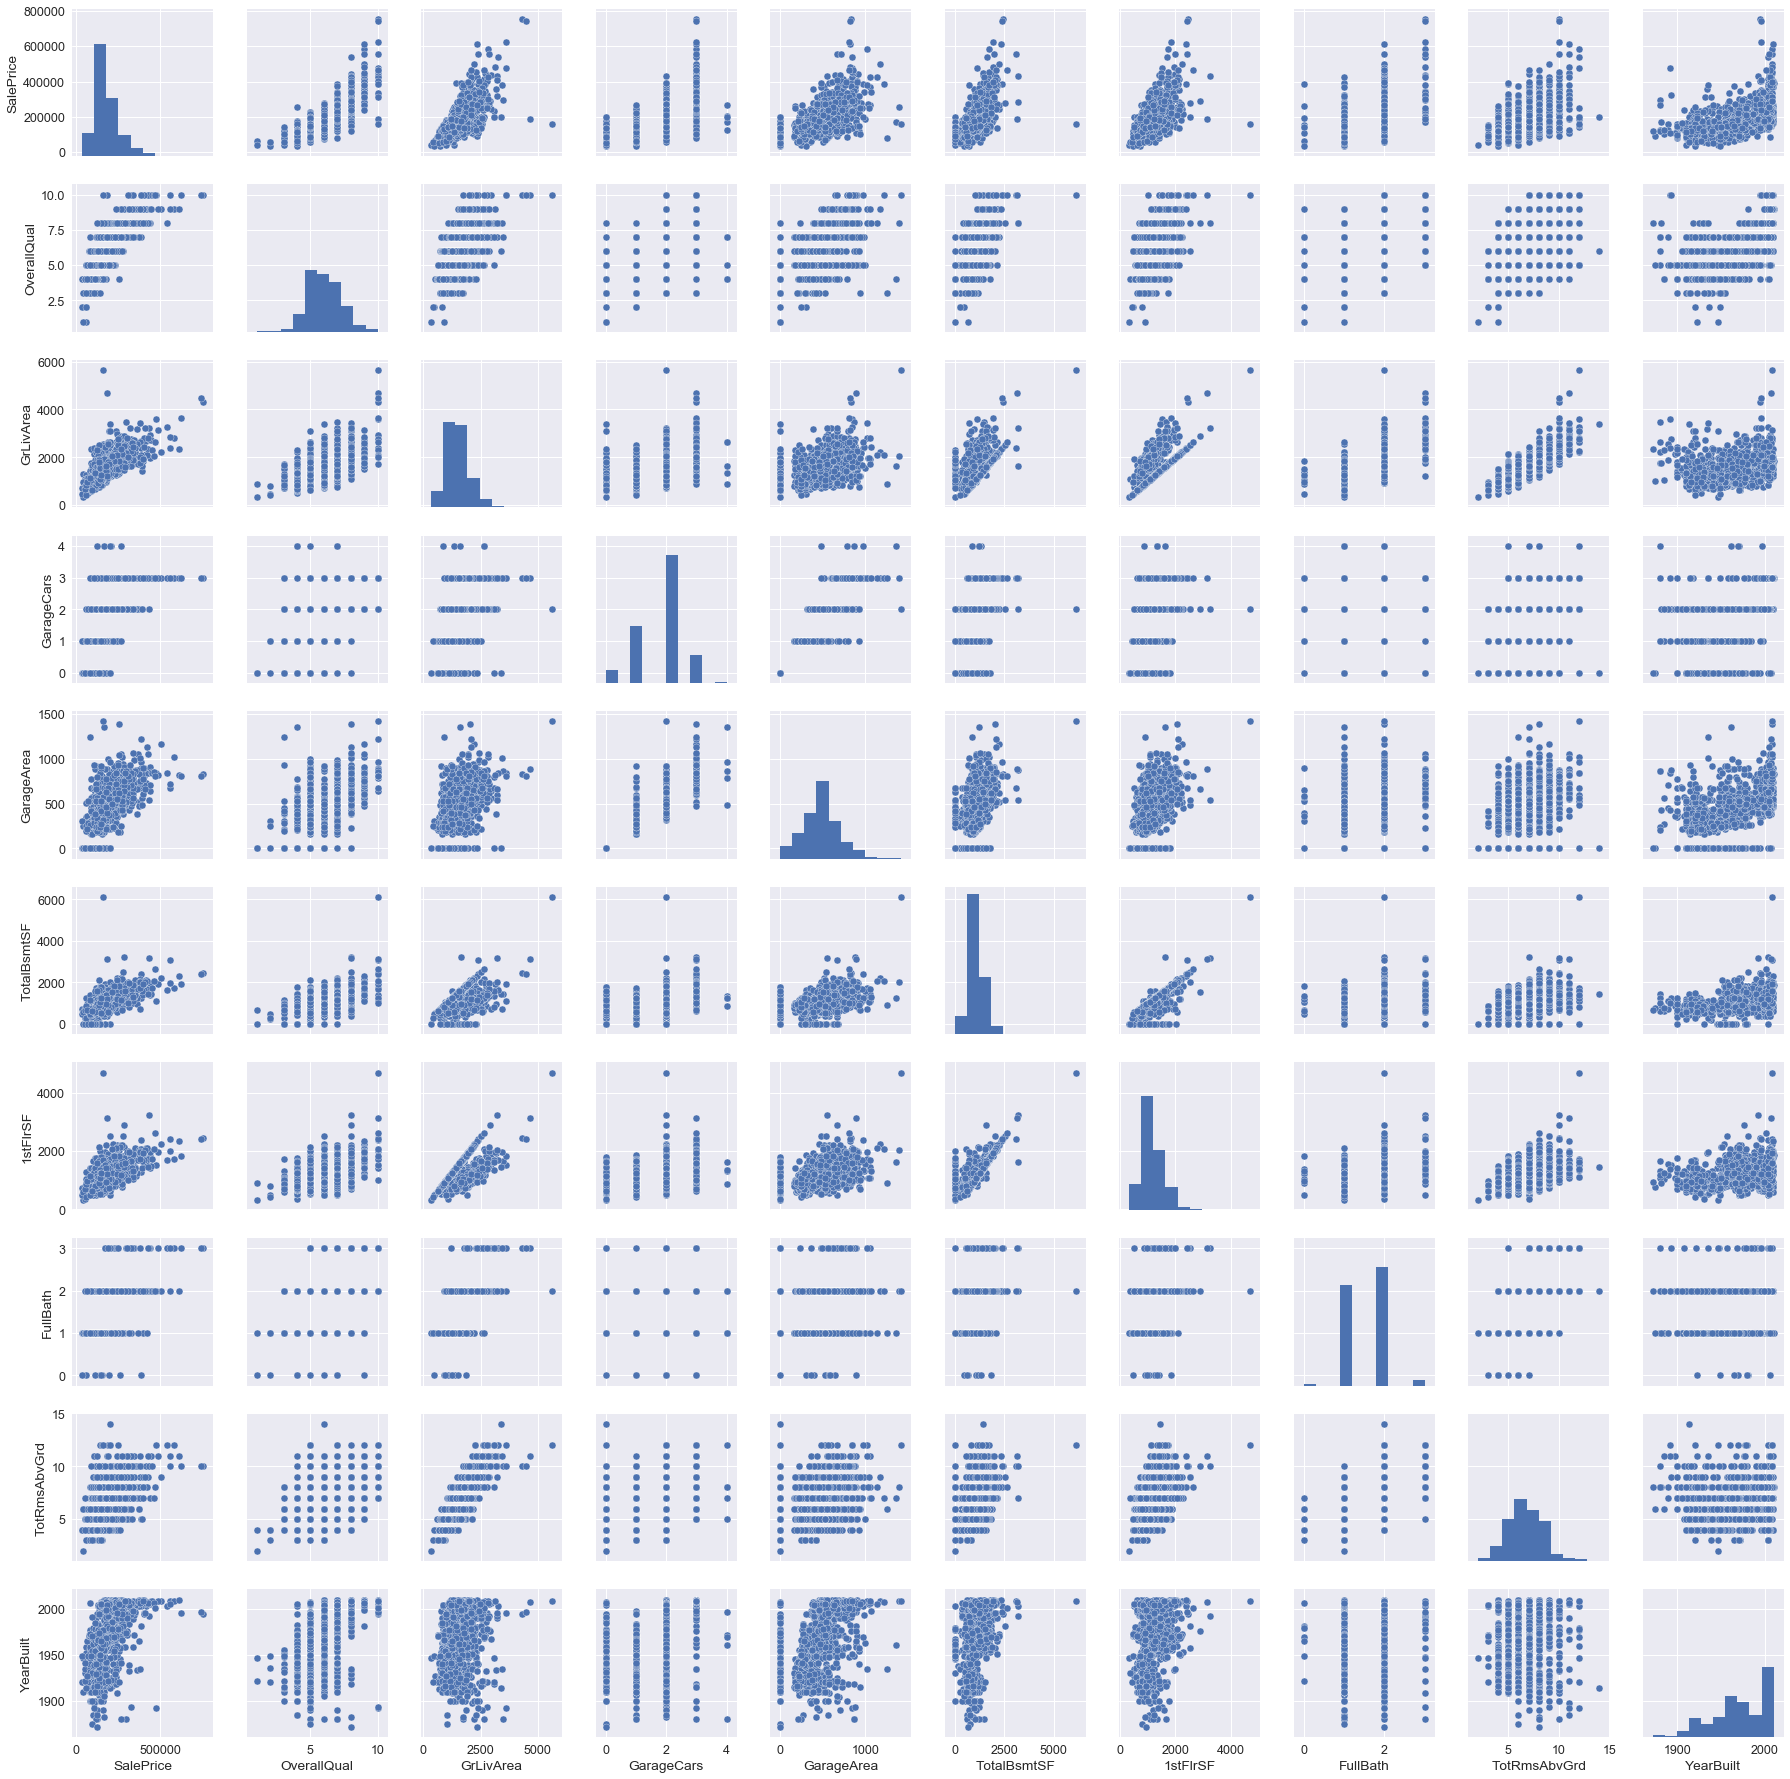

In [6]:
k = 10


cols = corrmap.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

sns.pairplot(data_train[cols])


In [7]:
from sklearn.ensemble import ExtraTreesClassifier

numerics = ['int16', 'int32', 'int64']

data_train_X_num = data_train_X.select_dtypes(include=numerics)

trees = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
trees.fit(data_train_X_num, np.ravel(data_train_Y))



ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Index(['Id', 'GrLivArea', 'LotArea', '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF',
       'YearBuilt', 'GarageArea', 'MoSold', 'YearRemodAdd', 'BsmtFinSF1',
       'YrSold', 'OpenPorchSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'OverallQual',
       'OverallCond', '2ndFlrSF', 'BedroomAbvGr', 'MSSubClass', 'Fireplaces',
       'BsmtFullBath', 'GarageCars', 'EnclosedPorch', 'HalfBath', 'BsmtFinSF2',
       'FullBath', 'ScreenPorch', 'BsmtHalfBath', 'MiscVal', 'KitchenAbvGr',
       '3SsnPorch', 'LowQualFinSF', 'PoolArea'],
      dtype='object')
(34,)


<Container object of 34 artists>

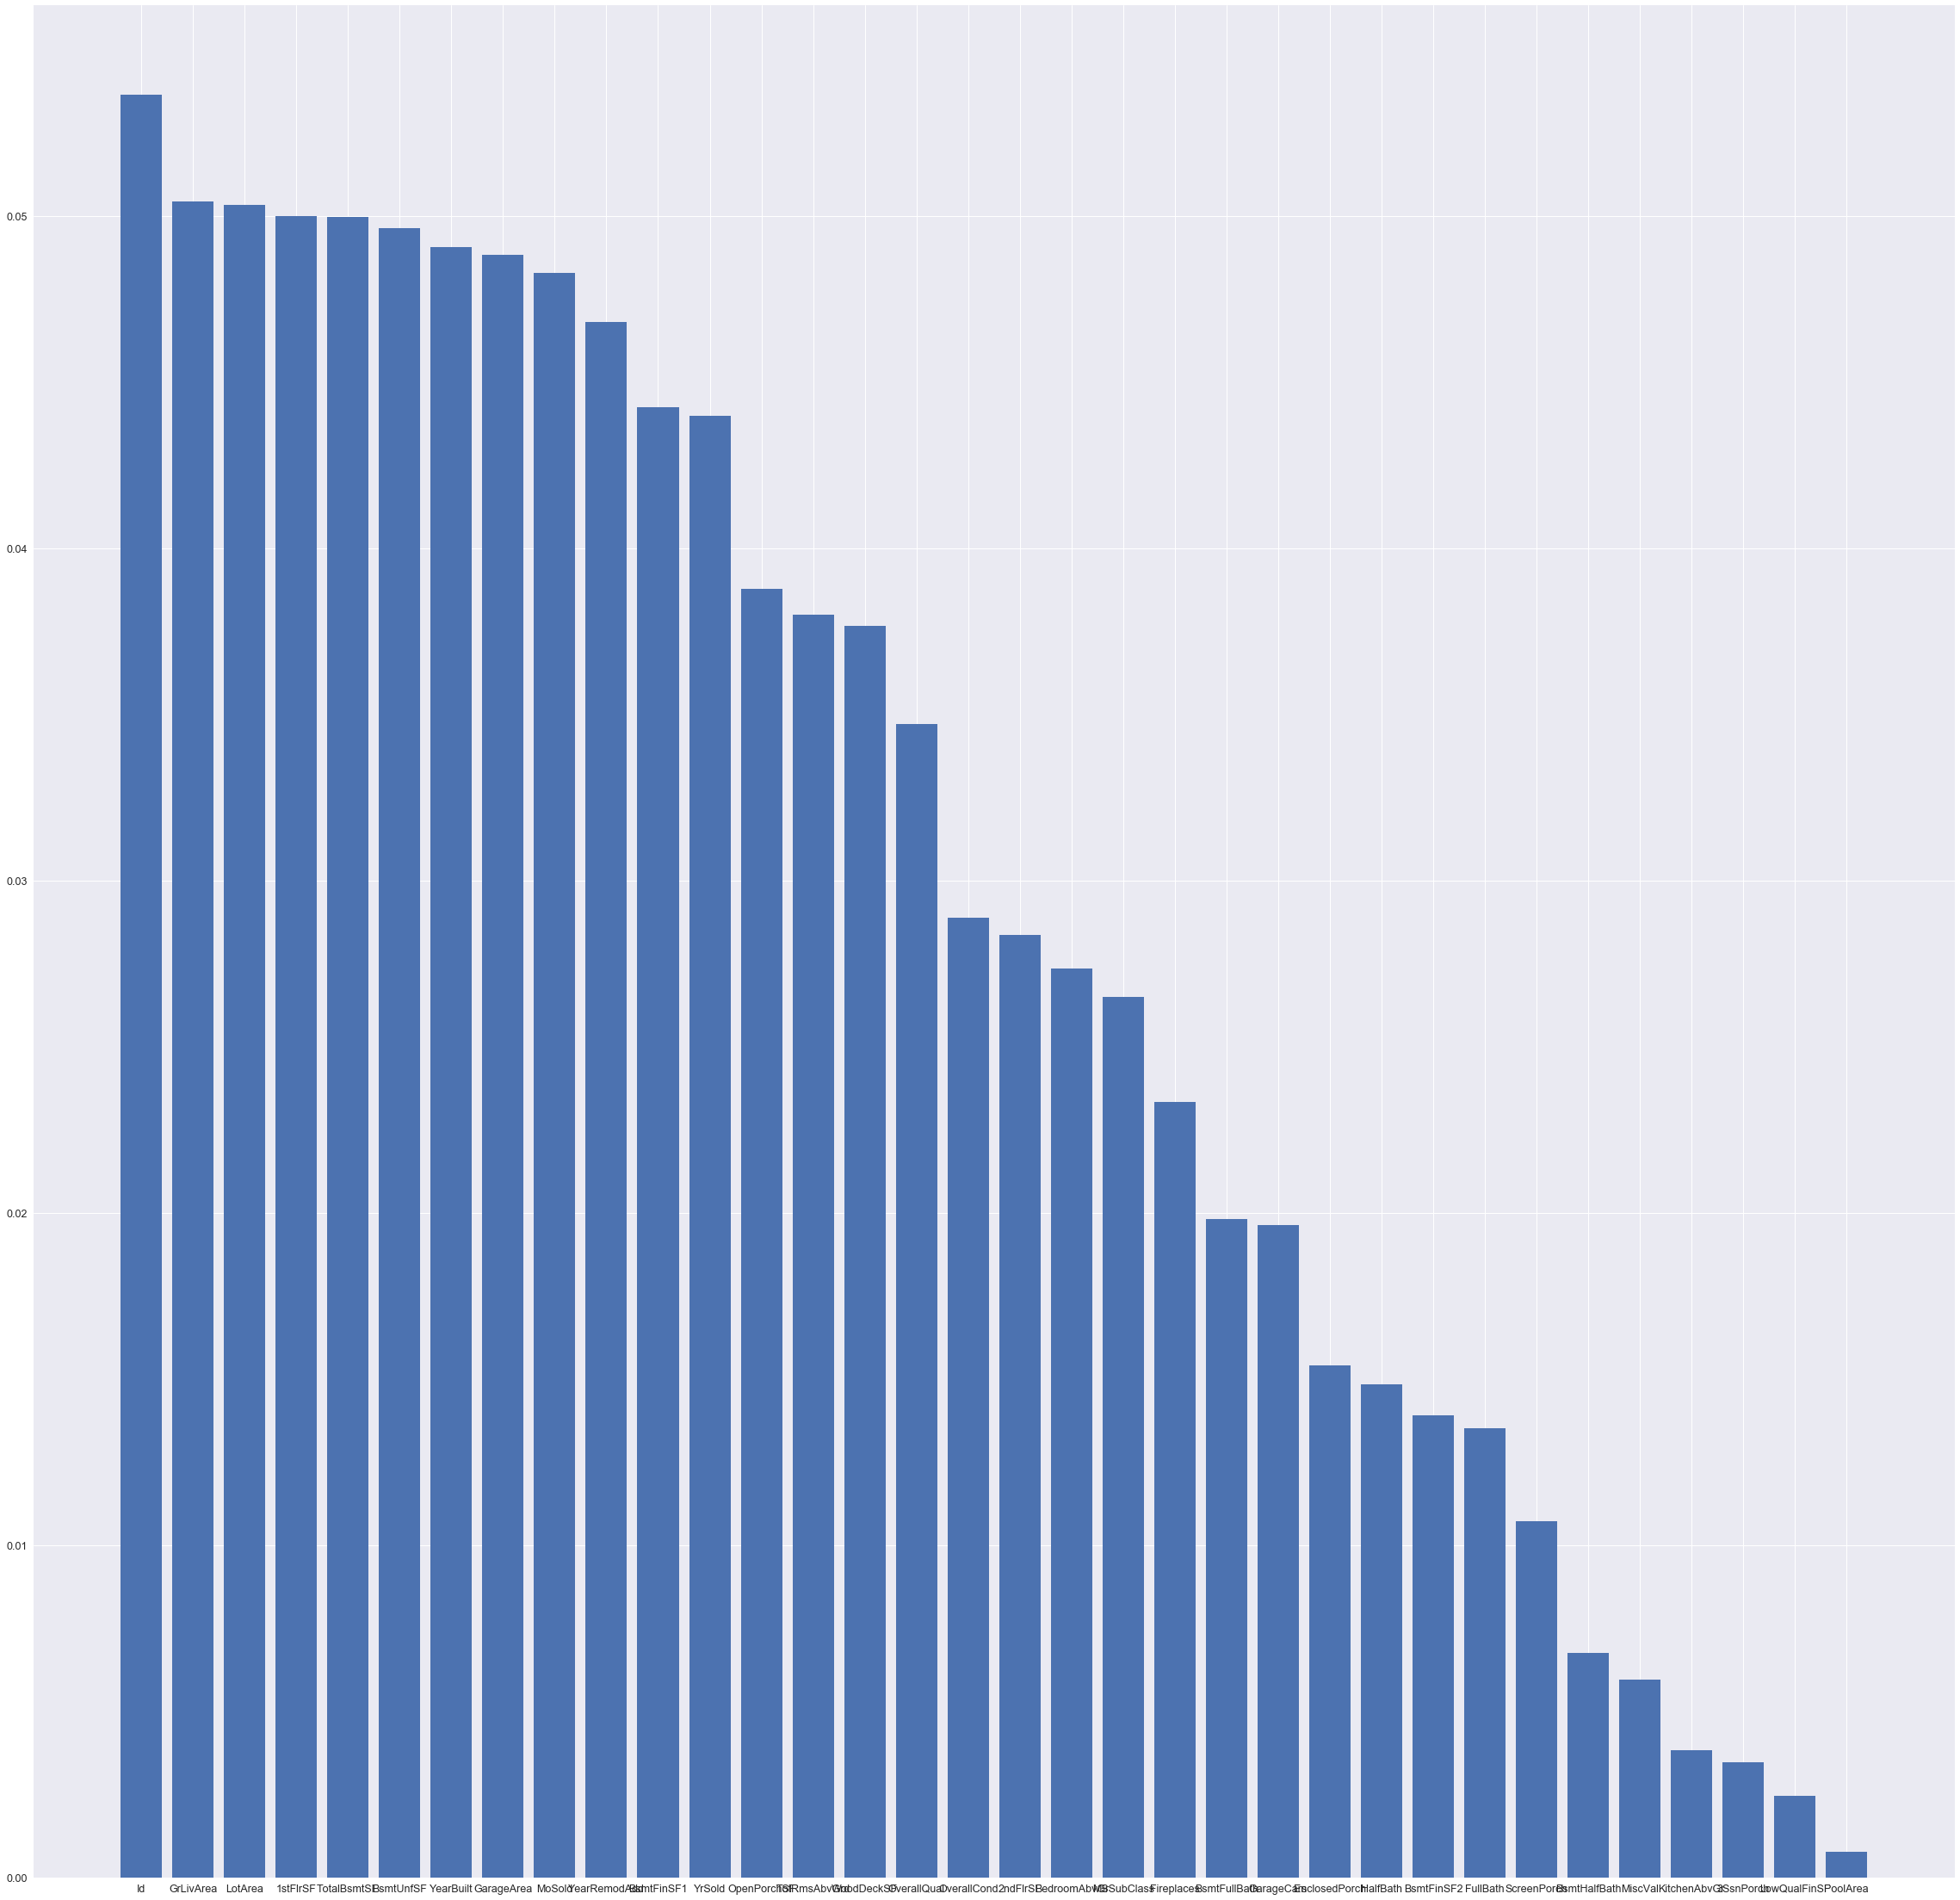

In [8]:
importances = trees.feature_importances_

col_name = data_train_X_num.columns

indices = np.argsort(importances)[::-1]
print(col_name[indices])
print(importances.shape)
plt.figure(figsize=(40, 40))
plt.bar(range(data_train_X_num.shape[1]), importances[indices], tick_label=col_name[indices])

In [9]:

data_train_X_proto = data_train_X[cols_proto]
data_train_X_proto.sample(10)

,GrLivArea,LotArea,1stFlrSF,TotalBsmtSF,BsmtUnfSF,YearBuilt,GarageArea,MoSold,YearRemodAdd
1302,2526,10120,1203,1165,425,1994,844,12,1994
972,918,7892,918,918,918,1979,264,4,1979
307,1406,7920,1035,319,319,1920,0,3,1950
1440,2555,11526,1423,588,588,1922,672,9,1994
509,1041,9600,1041,1041,50,1959,270,7,1959
428,1208,6762,1208,1208,544,2007,628,9,2007
708,1456,9018,728,728,728,2007,400,7,2007
616,1509,7861,807,783,326,2002,393,6,2003
298,1743,11700,1041,702,143,1968,539,6,1968
532,827,7200,827,0,0,1955,392,4,2007


In [12]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(data_train_X[cols_proto], data_train_Y, test_size=0.33, random_state=rng)

lreg = LinearRegression()
lreg.fit(X_train, y_train)

print(lreg.score(X_test, y_test))


NameError: name 'train_test_split' is not defined

In [13]:
data_pred[cols_pred].describe()

,Id,GrLivArea,LotArea,1stFlrSF,TotalBsmtSF,BsmtUnfSF,YearBuilt,GarageArea,MoSold,YearRemodAdd,OverallQual
count,1459.000000,1459.000000,1459.000000,1459.000000,1458.000000,1458.000000,1459.000000,1458.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,1486.045922,9819.161069,1156.534613,1046.117970,554.294925,1971.357779,472.768861,6.104181,1983.662783,6.078821
std,421.321334,485.566099,4955.517327,398.165820,442.898624,437.260486,30.390071,217.048611,2.722432,21.130467,1.436812
min,1461.000000,407.000000,1470.000000,407.000000,0.000000,0.000000,1879.000000,0.000000,1.000000,1950.000000,1.000000
25%,1825.500000,1117.500000,7391.000000,873.500000,784.000000,219.250000,1953.000000,318.000000,4.000000,1963.000000,5.000000
50%,2190.000000,1432.000000,9399.000000,1079.000000,988.000000,460.000000,1973.000000,480.000000,6.000000,1992.000000,6.000000
75%,2554.500000,1721.000000,11517.500000,1382.500000,1305.000000,797.750000,2001.000000,576.000000,8.000000,2004.000000,7.000000
max,2919.000000,5095.000000,56600.000000,5095.000000,5095.000000,2140.000000,2010.000000,1488.000000,12.000000,2010.000000,10.000000


In [11]:
data_pred = pd.read_csv('test.csv')
cols_pred = ['Id', 'GrLivArea', 'LotArea', '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF',
       'YearBuilt', 'GarageArea', 'MoSold', 'YearRemodAdd', 'OverallQual']

X_pred = data_pred[cols_pred]
X_pred = X_pred.fillna(0)

id_test = X_pred['Id']
X_pred = X_pred[cols_proto]



prediction = lreg.predict(X_pred)
data = pd.DataFrame({'Id':data_pred[cols_pred].fillna(0).Id, 'SalePrice': np.reshape(prediction, (-1))})

NameError: name 'lreg' is not defined

In [78]:

data.set_index('Id').to_csv('my_test.csv')